# Urea concentration prediction with PCA

In [1]:
# Import packages

# Pandas library for the pandas dataframes

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd   

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

In [2]:
# Import data

abs_data = pd.read_csv('Datasets/absorbances_dataset.csv')

# Date Codes:
# 44482 = 10/13/2021
# 44496 = 10/27/2021
# 44418 = 8/10/2021

### Add column to make solvent an integer

In [3]:
# Initiate solvent_id list
solvent_id = []

# Define solvent numerical id's
water_id = 0
fresh_dialysate_id = 1

# Populate solvent_id list with solvent numerical id's
for i in abs_data['solvent']:
    if i == 'water':
        solvent_id.append(water_id)
    else:
        solvent_id.append(fresh_dialysate_id)

# Add solvent_id list to Pandas DataFrame for absorption data (abs_data)
abs_data['solvent_id'] = solvent_id

### Specify features matrix as `X_columns` - wavelength and absorbance
We won't confuse the model with any other data right now.

In [4]:
X = abs_data[['wavelength (nm)', 'absorbance (A)', 'stdev.p', 'solvent_id']].values
y = abs_data[['urea_concentration (mM)']].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

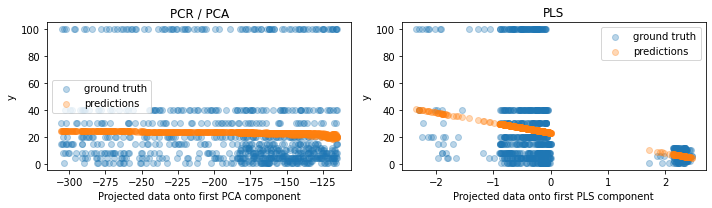

In [5]:
pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[0].scatter(
    pca.transform(X_test), pcr.predict(X_test), alpha=0.3, label="predictions"
)
axes[0].set(
    xlabel="Projected data onto first PCA component", ylabel="y", title="PCR / PCA"
)
axes[0].legend()
axes[1].scatter(pls.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[1].scatter(
    pls.transform(X_test), pls.predict(X_test), alpha=0.3, label="predictions"
)
axes[1].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
axes[1].legend()
plt.tight_layout()
plt.show()

In [6]:
print(f"PCR r-squared {pcr.score(X_test, y_test):.3f}")
print(f"PLS r-squared {pls.score(X_test, y_test):.3f}")

PCR r-squared -0.004
PLS r-squared 0.102
